# Computational Equivalence Engine
## Legal Distance Calculator

This tool calculates the distance score (d) between legal concepts from different jurisdictions using the Computational Equivalence Methodology.

**Instructions:**
1. Run each cell in order (click the play button ▶ on the left)
2. Fill out the form below with your legal concepts
3. Click "Run" to calculate the equivalence score

**Distance Scale:**
- **0.0** = Total Equivalent (perfect match)
- **0.1-1.9** = Functional Equivalent (same outcome, different form)
- **2.0-2.9** = Partial Equivalent (some overlap, different outcome)
- **3.0** = No Direct Equivalent (unique to jurisdiction)

In [1]:
# @title
# Install required packages
!pip install pandas numpy -q

print("✓ Dependencies installed successfully")

✓ Dependencies installed successfully


In [3]:
# @title
# COMPUTATIONAL EQUIVALENCE ENGINE - EMBEDDED
# This cell contains the complete algorithm

"""
================================================================================
COMPUTATIONAL EQUIVALENCE ENGINE (v1.0)
Official Implementation of the Methodology by Jason C. King (2026)

Paper/Methodology License: CC BY-NC-ND 4.0
Methodology Source: https://zenodo.org/records/18119046
Software License: Custom Academic/Non-Commercial (See Below)
================================================================================

⚠️ CRITICAL WARNING: ETHICAL COMPLIANCE & LIABILITY ⚠️

DO NOT DEPLOY THIS FRAMEWORK AUTONOMOUSLY.

1. NO LEGAL AUTHORITY: This software produces "Raw Algorithmic Output."
   It has zero legal authority until it undergoes the Scholarly Authentication
   Protocol by a qualified legal professional.

2. MANDATORY SUPERVISION: Under ABA Model Rules (Rules 5.1 & 5.3) and Formal
   Opinion 512, this tool is classified as "nonlawyer assistance." A qualified
   attorney must supervise and independently verify all outputs.

3. UNAUTHORIZED PRACTICE OF LAW (UPL): Reliance on this code to classify
   foreign law without verification by locally licensed or dual-qualified
   counsel may constitute the unauthorized practice of law.

DISCLAIMER: The authors assume no liability for the use of this software.
By running this script, you agree that you are solely responsible for
verifying the accuracy of any legal classification produced herein.

LICENSE TERMS (ACADEMIC USE ONLY):
Copyright © 2026 Jason Charles King. All Rights Reserved.

CITATION REQUIREMENT: Any publication resulting from the use of this software
must cite the original methodology:
  King, Jason C. (2026). Computational Equivalence: A Structured Methodology
  (Working Paper v3.0). Available at: https://zenodo.org/records/18119046

PERMISSION: Permission is hereby granted, free of charge, to any person
obtaining a copy of this software for the purpose of academic review, peer
validation, or non-commercial comparative legal research.

You MAY modify this code (create derivatives) strictly for the purpose of
testing the methodology on new jurisdictions or datasets.

You MAY NOT use this code, or any modified version of it, for commercial
purposes, legal consultancy, or paid advisory services without express written
permission from the copyright holder.
================================================================================
"""




"""
COMPUTATIONAL EQUIVALENCE ENGINE
A Structured Lab Methodology for Comparative Law

Based on: King, Jason C. (2026). Computational Equivalence:
A Structured Methodology (Working Paper v3.0)

This script implements the algorithmic filter for classifying legal equivalence
on a 31-point scale (0.0-3.0) using a three-step decision tree.
"""

"""
COMPUTATIONAL EQUIVALENCE LAB
Technical Implementation

Principal Data Scientist: Dr. Lars Henrik Daehli Skjolding
Date: February 1, 2026
"""



from dataclasses import dataclass
from typing import List, Optional, Tuple
from enum import Enum


class EquivalenceLevel(Enum):
    """Classification levels for legal equivalence"""
    TOTAL = "Total Legal Equivalent"
    FUNCTIONAL_STRONG = "Strong Functional Equivalent"
    FUNCTIONAL_STANDARD = "Standard Functional Equivalent"
    FUNCTIONAL_WEAK = "Weak Functional Equivalent"
    PARTIAL_STRONG = "Strong Partial Equivalent"
    PARTIAL_STANDARD = "Standard Partial Equivalent"
    PARTIAL_WEAK = "Weak Partial Equivalent"
    NO_DIRECT = "No Direct Legal Equivalent"


@dataclass
class LegalConcept:
    """Represents a legal concept for comparison"""
    name: str
    jurisdiction: str
    constituent_elements: List[str]  # Morphology
    regulatory_objective: str  # Teleology


@dataclass
class FunctionalTest:
    """Data for functional equivalency testing"""
    fact_pattern: str
    reliability_rate: float  # 0.0 to 1.0
    procedural_friction: str  # "low", "standard", "high"
    iteration_threshold: int  # N=1, N>=2, etc.


@dataclass
class EquivalenceResult:
    """Output of the computational analysis"""
    distance_score: float  # 0.0 to 3.0
    level: EquivalenceLevel
    confidence_interval: str
    rationale: str
    step_reached: int


class ComputationalEquivalenceEngine:
    """
    Implements the three-step algorithmic filter for legal equivalence.

    Logic Gates:
    - Step 1: Partial Equivalency Test (Core Feature Filter)
    - Step 2: Functional Equivalency Test (Same Outcome Filter)
    - Step 3: Total Equivalency Test (Perfect Substitution Filter)
    """

    def __init__(self):
        self.analysis_log = []

    def analyze(
        self,
        concept_a: LegalConcept,
        concept_b: LegalConcept,
        functional_test: Optional[FunctionalTest] = None
    ) -> EquivalenceResult:
        """
        Main entry point: Process concepts through the algorithmic filter.

        Args:
            concept_a: First legal concept
            concept_b: Second legal concept
            functional_test: Optional data for Step 2 testing

        Returns:
            EquivalenceResult with distance score and classification
        """
        self.analysis_log = []

        # STEP 1: PARTIAL EQUIVALENCY TEST
        step1_result = self._step1_core_feature_filter(concept_a, concept_b)

        if step1_result["classification"] == "NO_DIRECT":
            return EquivalenceResult(
                distance_score=3.0,
                level=EquivalenceLevel.NO_DIRECT,
                confidence_interval="d = 3.0",
                rationale=step1_result["rationale"],
                step_reached=1
            )

        # Provisional partial score from Step 1
        partial_score = step1_result["provisional_score"]

        # STEP 2: FUNCTIONAL EQUIVALENCY TEST
        if functional_test is None:
            # No functional data provided - finalize as Partial
            return self._finalize_partial_equivalent(partial_score, step1_result["rationale"])

        step2_result = self._step2_same_outcome_filter(functional_test)

        if not step2_result["outcomes_converge"]:
            # Outcomes diverge - finalize as Partial
            return self._finalize_partial_equivalent(partial_score, step2_result["rationale"])

        # Outcomes converge - promote to Functional
        functional_score = step2_result["functional_score"]

        # STEP 3: TOTAL EQUIVALENCY TEST
        step3_result = self._step3_perfect_substitution_filter(concept_a, concept_b, functional_test)

        if step3_result["perfect_substitution"]:
            return EquivalenceResult(
                distance_score=0.0,
                level=EquivalenceLevel.TOTAL,
                confidence_interval="d = 0.0",
                rationale=step3_result["rationale"],
                step_reached=3
            )

        # Not perfect - finalize as Functional
        return self._finalize_functional_equivalent(functional_score, step2_result["rationale"])


    def _step1_core_feature_filter(
        self,
        concept_a: LegalConcept,
        concept_b: LegalConcept
    ) -> dict:
        """
        GATE 1: Core Feature Filter

        Tests if sufficient basis for comparison exists.
        Prevents "Category Error" (comparing unrelated concepts).

        Core Features include:
        - Constituent Elements (Morphology): structural components
        - Regulatory Objective (Teleology): purpose/goal

        Returns:
            dict with classification and provisional score
        """
        self.analysis_log.append("=== STEP 1: PARTIAL EQUIVALENCY TEST ===")

        # Calculate morphological overlap
        common_elements = set(concept_a.constituent_elements) & set(concept_b.constituent_elements)
        morphology_match = len(common_elements)

        # Check teleological alignment
        teleology_match = (
            concept_a.regulatory_objective.lower() == concept_b.regulatory_objective.lower()
            or self._objectives_substantially_overlap(
                concept_a.regulatory_objective,
                concept_b.regulatory_objective
            )
        )

        self.analysis_log.append(f"Morphological overlap: {morphology_match} shared elements")
        self.analysis_log.append(f"Teleological match: {teleology_match}")

        # Decision Logic
        if morphology_match == 0 and not teleology_match:
            # NO MATCH - Category Error
            self.analysis_log.append("RESULT: No basis for comparison (Category Error)")
            return {
                "classification": "NO_DIRECT",
                "provisional_score": 3.0,
                "rationale": "Concepts share neither structural elements nor regulatory objectives."
            }

        # YES MATCH - Determine provisional Partial score
        if morphology_match >= 3:
            # High feature overlap
            provisional_score = 2.0  # Strong Partial
            strength = "Strong"
        elif morphology_match >= 1:
            # Moderate overlap
            provisional_score = 2.5  # Standard Partial
            strength = "Standard"
        else:
            # Only teleological match (low overlap)
            provisional_score = 2.9  # Weak Partial
            strength = "Weak"

        self.analysis_log.append(f"RESULT: {strength} Partial Equivalent (provisional d = {provisional_score})")
        self.analysis_log.append("→ Proceeding to Step 2")

        return {
            "classification": "PARTIAL",
            "provisional_score": provisional_score,
            "morphology_match": morphology_match,
            "teleology_match": teleology_match,
            "rationale": f"{strength} feature overlap detected ({morphology_match} structural + teleological alignment)"
        }


    def _step2_same_outcome_filter(self, functional_test: FunctionalTest) -> dict:
        """
        GATE 2: Same Outcome Filter

        Tests if concepts achieve the same practical outcome with ≥85% reliability.
        Distinguishes Functional Equivalents from "False Friends".

        Scoring based on:
        - Reliability Rate (>95%, >90%, 85-90%)
        - Procedural Friction (low, standard, high)

        Returns:
            dict with convergence status and functional score
        """
        self.analysis_log.append("\n=== STEP 2: FUNCTIONAL EQUIVALENCY TEST ===")
        self.analysis_log.append(f"Fact pattern: {functional_test.fact_pattern}")
        self.analysis_log.append(f"Reliability rate: {functional_test.reliability_rate * 100:.1f}%")
        self.analysis_log.append(f"Procedural friction: {functional_test.procedural_friction}")

        # Check minimum threshold
        if functional_test.reliability_rate < 0.85:
            self.analysis_log.append("RESULT: Outcomes diverge (reliability < 85%)")
            return {
                "outcomes_converge": False,
                "rationale": f"Reliability rate ({functional_test.reliability_rate * 100:.1f}%) below functional threshold"
            }

        # Outcomes converge - assign Functional score based on Jason's calibration:
        # 1. Constitutional Immediacy (0.1-0.2): LOW friction, standard N=1 path
        # 2. Plenary Immediacy (0.3-0.4): HIGH friction, exceptional N=1 path (institutional overhead)

        if functional_test.reliability_rate > 0.95 and functional_test.procedural_friction == "low" and functional_test.iteration_threshold == 1:
            # Strong Functional - Constitutional tier (0.1-0.2)
            # LOW FRICTION: N=1 is the STANDARD operating mode (e.g., Recurso de Amparo)
            functional_score = 0.15
            strength = "Strong (Constitutional)"
            interval = "0.1-0.2"
        elif functional_test.reliability_rate > 0.95 and functional_test.procedural_friction == "high":
            # Strong Functional - Plenary tier (0.3-0.4)
            # HIGH FRICTION: N=1 requires institutional overhead of convening full court (e.g., Sentencia del Pleno)
            functional_score = 0.35
            strength = "Strong (Plenary)"
            interval = "0.3-0.4"
        elif functional_test.reliability_rate > 0.90:
            # Standard Functional
            functional_score = 1.0  # Baseline standard
            strength = "Standard"
            interval = "0.5-1.4"
        else:
            # Weak Functional (85-90% or high friction)
            functional_score = 1.7
            strength = "Weak"
            interval = "1.5-1.9"

        self.analysis_log.append(f"RESULT: Outcomes converge - {strength} Functional Equivalent (d = {functional_score})")
        self.analysis_log.append("→ Proceeding to Step 3")

        return {
            "outcomes_converge": True,
            "functional_score": functional_score,
            "strength": strength,
            "interval": interval,
            "rationale": f"{strength} functional match (reliability {functional_test.reliability_rate * 100:.1f}%, {functional_test.procedural_friction} friction)"
        }


    def _step3_perfect_substitution_filter(
        self,
        concept_a: LegalConcept,
        concept_b: LegalConcept,
        functional_test: FunctionalTest
    ) -> dict:
        """
        GATE 3: Perfect Substitution Filter

        Tests for Total Equivalence - the rare "Exact Match".
        Requires direct substitutability without ANY change in:
        - Practical outcome
        - Legal definition
        - Underlying doctrine
        - Theoretical interpretation

        Even in complex and novel situations.

        Returns:
            dict with substitution status
        """
        self.analysis_log.append("\n=== STEP 3: TOTAL EQUIVALENCY TEST ===")

        # Perfect substitution requires:
        # 1. ALL constituent elements identical
        # 2. Identical regulatory objectives
        # 3. Zero procedural friction
        # 4. N=1 threshold match (for precedent systems)

        all_elements_match = set(concept_a.constituent_elements) == set(concept_b.constituent_elements)
        objectives_identical = concept_a.regulatory_objective == concept_b.regulatory_objective
        zero_friction = functional_test.procedural_friction == "low"

        self.analysis_log.append(f"All elements identical: {all_elements_match}")
        self.analysis_log.append(f"Objectives identical: {objectives_identical}")
        self.analysis_log.append(f"Zero procedural friction: {zero_friction}")

        if all_elements_match and objectives_identical and zero_friction:
            self.analysis_log.append("RESULT: Perfect substitution confirmed (Total Equivalent)")
            return {
                "perfect_substitution": True,
                "rationale": "Concepts are superimposable - perfect one-to-one match in all dimensions"
            }

        self.analysis_log.append("RESULT: Doctrinal divergence detected (not Total Equivalent)")
        return {
            "perfect_substitution": False,
            "rationale": "Concepts achieve same outcome but remain doctrinally distinct"
        }


    def _finalize_partial_equivalent(self, score: float, rationale: str) -> EquivalenceResult:
        """Finalize classification as Partial Equivalent"""
        if score <= 2.1:
            level = EquivalenceLevel.PARTIAL_STRONG
            interval = "2.0-2.1"
        elif score <= 2.7:
            level = EquivalenceLevel.PARTIAL_STANDARD
            interval = "2.2-2.7"
        else:
            level = EquivalenceLevel.PARTIAL_WEAK
            interval = "2.8-2.9"

        return EquivalenceResult(
            distance_score=score,
            level=level,
            confidence_interval=f"d = {interval}",
            rationale=rationale + " (Structural overlap but functional divergence)",
            step_reached=2
        )


    def _finalize_functional_equivalent(self, score: float, rationale: str) -> EquivalenceResult:
        """Finalize classification as Functional Equivalent"""
        if score <= 0.4:
            level = EquivalenceLevel.FUNCTIONAL_STRONG
            interval = "0.1-0.4"
        elif score <= 1.4:
            level = EquivalenceLevel.FUNCTIONAL_STANDARD
            interval = "0.5-1.4"
        else:
            level = EquivalenceLevel.FUNCTIONAL_WEAK
            interval = "1.5-1.9"

        return EquivalenceResult(
            distance_score=score,
            level=level,
            confidence_interval=f"d = {interval}",
            rationale=rationale + " (Same practical outcome despite formal differences)",
            step_reached=3
        )


    def _objectives_substantially_overlap(self, obj_a: str, obj_b: str) -> bool:
        """
        Helper: Check if regulatory objectives substantially overlap.
        This is a simplified heuristic - in practice would use NLP/LLM analysis.
        """
        # Simple keyword matching for demonstration
        keywords_a = set(obj_a.lower().split())
        keywords_b = set(obj_b.lower().split())
        overlap = len(keywords_a & keywords_b) / max(len(keywords_a), len(keywords_b))
        return overlap > 0.5


    def get_analysis_log(self) -> str:
        """Return the detailed analysis log"""
        return "\n".join(self.analysis_log)


def calculate_convergence_vector(d_t1: float, d_t2: float) -> Tuple[float, str]:
    """
    Calculate Legal Convergence Vector (V_legal)

    V_legal = d(t1) - d(t2)

    Args:
        d_t1: Legal Distance at time T1 (before change)
        d_t2: Legal Distance at time T2 (after change)

    Returns:
        Tuple of (vector_value, interpretation)
    """
    v_legal = d_t1 - d_t2

    if v_legal > 0:
        magnitude = "High" if abs(v_legal) >= 1.5 else "Incremental"
        interpretation = f"Legal Convergence (+{v_legal:.1f}) - {magnitude} harmonization"
    elif v_legal < 0:
        magnitude = "High" if abs(v_legal) >= 1.5 else "Incremental"
        interpretation = f"Legal Divergence ({v_legal:.1f}) - {magnitude} drift"
    else:
        interpretation = "Stable Equivalence (0.0) - No net change or Feature Shift"

    return v_legal, interpretation


if __name__ == "__main__":
    print("Computational Equivalence Engine - Test Suite")
    print("=" * 60)
    print("\nEngine initialized successfully.")
    print("Ready for pilot data from Stare Decisis comparative study.")


# Initialize engine
engine = ComputationalEquivalenceEngine()

print("✓ Computational Equivalence Engine loaded")
print("✓ Ready to analyze legal concepts")

Computational Equivalence Engine - Test Suite

Engine initialized successfully.
Ready for pilot data from Stare Decisis comparative study.
✓ Computational Equivalence Engine loaded
✓ Ready to analyze legal concepts


COMPUTATIONAL EQUIVALENCE ANALYSIS RESULTS

Comparing: Stare Decisis (United States)
      vs: Jurisprudencia (Spain)

----------------------------------------------------------------------
DISTANCE SCORE:     d = 2.5
CLASSIFICATION:     Standard Partial Equivalent
CONFIDENCE RANGE:   d = 2.2-2.7
DECISION PATH:      Reached Step 2
----------------------------------------------------------------------

ANALYSIS RATIONALE:
Reliability rate (10.0%) below functional threshold (Structural overlap but functional divergence)


INTERPRETATION GUIDE:

🟠 PARTIAL EQUIVALENT
   Shared features but divergent outcomes - 'Legal False Friends'



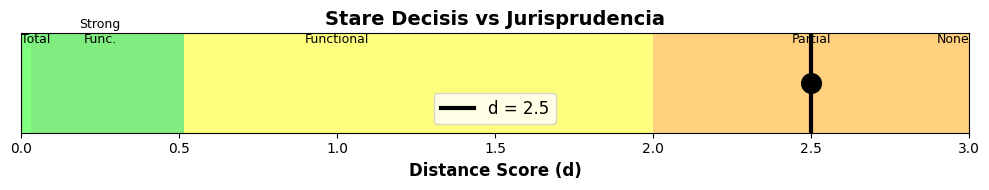

Your score of d=2.5 falls in the Standard Partial Equivalent category


In [4]:
#@title Legal Concept Analysis Form { run: "auto", vertical-output: true }

#@markdown ## Concept A (First Jurisdiction)

concept_a_name = "Stare Decisis" #@param {type:"string"}
concept_a_jurisdiction = "United States" #@param {type:"string"}
concept_a_elements = "binding precedent, vertical hierarchy, case law" #@param {type:"string"}
concept_a_objective = "Ensure legal uniformity and predictability" #@param {type:"string"}

#@markdown ---

#@markdown ## Concept B (Second Jurisdiction)

concept_b_name = "Jurisprudencia" #@param {type:"string"}
concept_b_jurisdiction = "Spain" #@param {type:"string"}
concept_b_elements = "binding precedent, vertical hierarchy, statutory interpretation" #@param {type:"string"}
concept_b_objective = "Ensure legal uniformity and predictability" #@param {type:"string"}

#@markdown ---

#@markdown ## Functional Test Parameters

fact_pattern = "Standard precedent application in lower courts" #@param {type:"string"}
reliability_rate = 0.1 #@param {type:"slider", min:0.0, max:1.0, step:0.01}
procedural_friction = "standard" #@param ["low", "standard", "high"]
iteration_threshold = 3 #@param {type:"slider", min:1, max:5, step:1}

#@markdown ---
#@markdown Click the **play button** above to calculate the equivalence score

# Process the inputs
concept_a_elements_list = [e.strip() for e in concept_a_elements.split(',')]
concept_b_elements_list = [e.strip() for e in concept_b_elements.split(',')]

# Create LegalConcept objects
concept_a = LegalConcept(
    name=concept_a_name,
    jurisdiction=concept_a_jurisdiction,
    constituent_elements=concept_a_elements_list,
    regulatory_objective=concept_a_objective
)

concept_b = LegalConcept(
    name=concept_b_name,
    jurisdiction=concept_b_jurisdiction,
    constituent_elements=concept_b_elements_list,
    regulatory_objective=concept_b_objective
)

# Create FunctionalTest object
test = FunctionalTest(
    fact_pattern=fact_pattern,
    reliability_rate=reliability_rate,
    procedural_friction=procedural_friction,
    iteration_threshold=iteration_threshold
)

# Run analysis
result = engine.analyze(concept_a, concept_b, test)

# Display results
print("="*70)
print("COMPUTATIONAL EQUIVALENCE ANALYSIS RESULTS")
print("="*70)
print()
print(f"Comparing: {concept_a_name} ({concept_a_jurisdiction})")
print(f"      vs: {concept_b_name} ({concept_b_jurisdiction})")
print()
print("-"*70)
print(f"DISTANCE SCORE:     d = {result.distance_score}")
print(f"CLASSIFICATION:     {result.level.value}")
print(f"CONFIDENCE RANGE:   {result.confidence_interval}")
print(f"DECISION PATH:      Reached Step {result.step_reached}")
print("-"*70)
print()
print("ANALYSIS RATIONALE:")
print(result.rationale)
print()
print("="*70)

# Interpretation guide
print()
print("INTERPRETATION GUIDE:")
print()
if result.distance_score == 0.0:
    print("🟢 TOTAL EQUIVALENT")
    print("   Perfect match - concepts are interchangeable in all contexts")
elif result.distance_score < 0.5:
    print("🟢 STRONG FUNCTIONAL EQUIVALENT")
    if result.distance_score < 0.3:
        print("   (Constitutional tier - immediate binding, low friction)")
    else:
        print("   (Plenary tier - immediate binding, high institutional overhead)")
elif result.distance_score < 2.0:
    print("🟡 FUNCTIONAL EQUIVALENT")
    if result.distance_score < 1.5:
        print("   (Standard tier - reliable outcome, >90% consistency)")
    else:
        print("   (Weak tier - same outcome but with procedural friction)")
elif result.distance_score < 3.0:
    print("🟠 PARTIAL EQUIVALENT")
    print("   Shared features but divergent outcomes - 'Legal False Friends'")
else:
    print("🔴 NO DIRECT EQUIVALENT")
    print("   Unique concept with no comparable counterpart")
print()
print("="*70)



#@title Distance Score Visualization (Optional)

import matplotlib.pyplot as plt
import numpy as np

# Create visualization
fig, ax = plt.subplots(figsize=(10, 2))

# Distance scale
scale = np.linspace(0, 3, 100)
colors = []
for val in scale:
    if val == 0:
        colors.append('#00FF00')  # Green - Total
    elif val < 0.5:
        colors.append('#00DD00')  # Dark green - Strong Functional
    elif val < 2.0:
        colors.append('#FFFF00')  # Yellow - Functional
    elif val < 3.0:
        colors.append('#FFA500')  # Orange - Partial
    else:
        colors.append('#FF0000')  # Red - No Direct

# Plot gradient
for i in range(len(scale)-1):
    ax.axvspan(scale[i], scale[i+1], facecolor=colors[i], alpha=0.5)

# Mark the calculated score
ax.axvline(result.distance_score, color='black', linewidth=3,
           label=f'd = {result.distance_score}')
ax.scatter([result.distance_score], [0.5], color='black', s=200, zorder=5)

# Labels
ax.set_xlim(0, 3)
ax.set_ylim(0, 1)
ax.set_xlabel('Distance Score (d)', fontsize=12, fontweight='bold')
ax.set_yticks([])
ax.set_xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
ax.legend(fontsize=12)
ax.set_title(f'{concept_a_name} vs {concept_b_name}',
             fontsize=14, fontweight='bold')

# Add zone labels
ax.text(0, 0.9, 'Total', ha='left', fontsize=9)
ax.text(0.25, 0.9, 'Strong\nFunc.', ha='center', fontsize=9)
ax.text(1.0, 0.9, 'Functional', ha='center', fontsize=9)
ax.text(2.5, 0.9, 'Partial', ha='center', fontsize=9)
ax.text(3.0, 0.9, 'None', ha='right', fontsize=9)

plt.tight_layout()
plt.show()

print(f"Your score of d={result.distance_score} falls in the {result.level.value} category")